# FAKE NEWS DETECTION SYSTEM USING PYTHON AND MACHINE LEARNING


# Required Libraries

Step 1 :We are importing the required libraries in python for our system .

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

### Inserting fake and real dataset

# Introduction to Dataset

Step 2 : Here we are introducing the datasets and allowing pandas to load the files in the system

In [79]:
fake_dataSet = pd.read_csv("Fake.csv")
true_dataSet = pd.read_csv("True.csv")

In [80]:
true_dataSet #displaying dataset

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [81]:
fake_dataSet # displaying dataset

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


Step 3 : Here our motive is to add an column to dataset tables inorder to title the news either fake or true news.

In [82]:
fake_dataSet["fake/true"] = 0
true_dataSet["fake/true"] = 1

In [83]:
fake_dataSet

,title,text,subject,date,fake/true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [84]:
true_dataSet

,title,text,subject,date,fake/true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


Step 4 : Here we are going to remove the 10 rows from the bottom of the table for the manual testing process

In [85]:
dataSet_fake_manualTest = fake_dataSet.tail(10)
for i in range(23480,23470,-1): #range of size
    fake_dataSet.drop([i], axis = 0, inplace = True) #drop function to remove 
dataSet_true_manualTest = true_dataSet.tail(10)
for i in range(21416,21406,-1): #range of size
    true_dataSet.drop([i], axis = 0, inplace = True)  #drop function to remove 

In [86]:
fake_dataSet.shape, true_dataSet.shape #display size of dataframe

((23471, 5), (21407, 5))

Step 5 : Combining the manaul testing data into the single dataset csv file.

In [87]:
dataSet_fake_manualTest["fake/true"] = 0
dataSet_true_manualTest["fake/true"] = 1

<ipython-input-87-6f229a96bc78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet_fake_manualTest["fake/true"] = 0
<ipython-input-87-6f229a96bc78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet_true_manualTest["fake/true"] = 1


In [88]:
dataSet_fake_manualTest.head() #display manual test data

,title,text,subject,date,fake/true
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [89]:
dataSet_true_manualTest.head()  #display manual test data

,title,text,subject,date,fake/true
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [90]:
dataSet_manualTest = pd.concat([dataSet_fake_manualTest,dataSet_true_manualTest], axis = 0)
dataSet_manualTest.to_csv("manualTest.csv")

Merging the main fake and true dataframe

Step 6 : Here we are going to combine the main true and fake news dataset 

In [91]:
dataSet_combine = pd.concat([fake_dataSet, true_dataSet], axis =0 )
dataSet_combine

,title,text,subject,date,fake/true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1


Step 7: As we are heading to train the models , we are going to remove the less important columns such as title , subject , date etc.This is for more better understanding the dataset.

In [92]:
dataSet = dataSet_combine.drop(["title", "subject","date"], axis = 1)
dataSet.isnull().sum()

text         0
fake/true    0
dtype: int64

Step 8: Here we are attempting to shuffle the dataset

In [93]:
dataSet = dataSet.sample(frac = 1)
dataSet

,text,fake/true
21831,"These are people who claim to love diversity,...",0
5852,The GOP is notoriously hostile to the LGBTQ co...,0
19131,THIS IS OUTRAGEOUS! YOU WON T BELIEVE THIS!,0
6797,Right-ing paranoid whackjob Pat Boone has decl...,0
450,A Michigan woman decided to defend against tyr...,0
...,...,...
6597,"Only April 28, nearly 100 lawmakers sent a let...",0
16054,PRESIDENT TRUMP ON OVERREGULATION: They spent...,0
9427,HANOI (Reuters) - U.S. President Barack Obama ...,1
10892,Anderson Cooper decided it would be a good ide...,0


In [94]:
dataSet.reset_index(inplace = True)
dataSet.drop(["index"], axis = 1, inplace = True)
dataSet.columns

Index(['text', 'fake/true'], dtype='object')

In [95]:
dataSet

,text,fake/true
0,"These are people who claim to love diversity,...",0
1,The GOP is notoriously hostile to the LGBTQ co...,0
2,THIS IS OUTRAGEOUS! YOU WON T BELIEVE THIS!,0
3,Right-ing paranoid whackjob Pat Boone has decl...,0
4,A Michigan woman decided to defend against tyr...,0
...,...,...
44873,"Only April 28, nearly 100 lawmakers sent a let...",0
44874,PRESIDENT TRUMP ON OVERREGULATION: They spent...,0
44875,HANOI (Reuters) - U.S. President Barack Obama ...,1
44876,Anderson Cooper decided it would be a good ide...,0


Step 9: Now, we define a funtion which can remove the unwanted spaces, convert the given texts from uppercase to lowercase, remove the special characters, links and urls.

In [96]:
def word_del(text):
    text = text.lower()
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub('https?://\S+|www.\.\S+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub("\\W", " ", text)
    return text

In [97]:
dataSet["text"] = dataSet["text"].apply(word_del)

Step 10 : We now define the required independent and dependent variables as X and Y for the training and testing set

In [60]:
X = dataSet["text"]
Y = dataSet["fake/true"]

Step 11 : We are performing the splitting of dataset and form the training dataset and the testing dataset

In [61]:
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(X, Y, test_size=0.25)

Step 12 : We are here converting the text data to vectors

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer()
x_vector_train_data = vector.fit_transform(x_train_data)
x_vector_test_data = vector.transform(x_test_data)

# Machine Learning Algorithms

Step 13 : Here we are training the models with the machine learning algorithms and presdicting the accuracy score

# ML1_Algorithm:- Logisitic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [64]:
logistic_Reg = LogisticRegression()
logistic_Reg.fit(x_vector_train_data,y_train_data)

LogisticRegression()

In [67]:
# Predicting the Binary Label:
y_predict_logistic_Reg = logistic_Reg.predict(x_vector_test_data)

#Accuracy score
logistic_Reg.score(x_vector_test_data, y_test_data)

0.985204991087344

In [68]:
print(classification_report(y_test_data, y_predict_logistic_Reg))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5903
           1       0.98      0.99      0.98      5317

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [69]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_logistic_Reg = logistic_Reg.predict_proba(x_vector_test_data)

In [70]:
# This line prints the "actual label" of the testing set:
print(y_test_data)

# This line prints the "predicted label" for the testing set:
print(y_predict_logistic_Reg)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_logistic_Reg)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_logistic_Reg[f

6070     1
33541    0
33575    1
9627     1
41265    1
        ..
41142    1
2275     0
44033    1
34922    1
20014    1
Name: fake/true, Length: 11220, dtype: int64
[1 0 1 ... 1 1 1]
[[0.44088918 0.55911082]
 [0.99482373 0.00517627]
 [0.24946054 0.75053946]
 ...
 [0.00270155 0.99729845]
 [0.22924653 0.77075347]
 [0.04321372 0.95678628]]
[0.55911082 0.00517627 0.75053946 ... 0.99729845 0.77075347 0.95678628]


In [71]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test_data, y_predict_prob_logistic_Reg[:,1], pos_label=1)
print(fpr)
print(tpr)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.69405387e-04 1.69405387e-04 3.38810774e-04
 3.38810774e-04 5.08216161e-04 5.08216161e-04 6.77621548e-04
 6.77621548e-04 6.77621548e-04 6.77621548e-04 8.47026935e-04
 8.47026935e-04 8.47026935e-04 8.47026935e-04 1.18583771e-03
 1.18583771e-03 1.35524310e-03 1.35524310e-03 1.52464848e-03
 1.52464848e-03 1.69405387e-03 1.69405387e-03 1.86345926e-03
 1.86345926e-03 2.03286465e-03 2.03286465e-03 2.20227003e-03
 2.20227003e-03 2.37167542e-03 2.37167542e-03 2.54108081e-03
 2.54108081e-03 2.71048619e-03 2.71048619e-03 3.04929697e-03
 3.04929697e-03 3.218702

In [72]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.9984745549890619


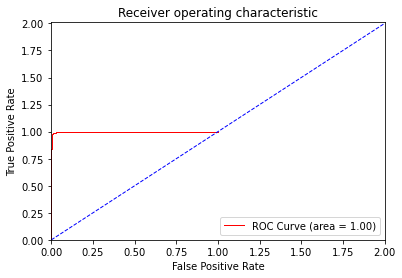

In [73]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=1, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 2], [0, 2], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 2.005])
plt.ylim([0.0, 2.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# ML2_Algorithm :- Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
decision_Tree_classifier = DecisionTreeClassifier()
decision_Tree_classifier.fit(x_vector_train_data, y_train_data)

DecisionTreeClassifier()

In [98]:
# Predicting the Binary Label:
y_predict_decision_tree = decision_Tree_classifier.predict(x_vector_test_data)

#Accuracy Score
decision_Tree_classifier.score(x_vector_test_data, y_test_data)

0.9959893048128342

In [99]:
print(classification_report(y_test_data, y_predict_decision_tree))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5903
           1       1.00      0.99      1.00      5317

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [100]:
from sklearn import metrics

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_decision_tree = decision_Tree_classifier.predict_proba(x_vector_test_data)

# This line prints the "actual label" of the testing set:
print(y_test_data)

# This line prints the "predicted label" for the testing set:
print(y_predict_decision_tree)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_decision_tree)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_decision_tree[:,1])


fpr1_decision_tree, tpr1_decision_tree, thresholds = metrics.roc_curve(y_test_data, y_predict_prob_decision_tree[:,1], pos_label=1)

print(fpr1_decision_tree)
print(tpr1_decision_tree)



6070     1
33541    0
33575    1
9627     1
41265    1
        ..
41142    1
2275     0
44033    1
34922    1
20014    1
Name: fake/true, Length: 11220, dtype: int64
[1 0 1 ... 1 1 1]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[1. 0. 1. ... 1. 1. 1.]
[0.         0.00254108 0.03811621 1.        ]
[0.         0.99435772 0.99435772 1.        ]


In [101]:
# AUC:
AUC_decision_Tree_classifier = metrics.auc(fpr1_decision_tree, tpr1_decision_tree)
print(AUC_decision_Tree_classifier)

0.9958079574397083


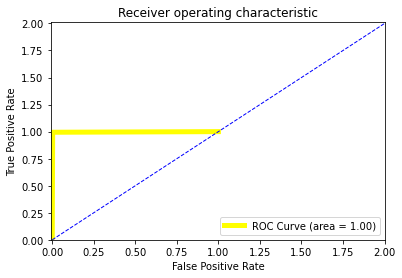

In [102]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr1_decision_tree, tpr1_decision_tree, color='yellow', lw=5, 
         label='ROC Curve (area = %0.2f)' % AUC_decision_Tree_classifier)

# Random Guess line:
plt.plot([0, 2], [0, 2], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.010, 2.005])
plt.ylim([0.0, 2.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# ML3_Algorithm:- Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(random_state=0)
RandomForest.fit(x_vector_train_data, y_train_data)

# Predicting the Binary Label:
y_predict_RandomForest  = RandomForest.predict(x_vector_test_data)

#Accuracy Score
RandomForest.score(x_vector_test_data, y_test_data)



0.9859180035650624

In [104]:
print(classification_report(y_test_data, y_predict_RandomForest))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5903
           1       0.99      0.98      0.99      5317

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [106]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_RandomForest = RandomForest.predict_proba(x_vector_test_data)

# This line prints the "actual label" of the testing set:
print(y_test_data)

# This line prints the "predicted label" for the testing set:
print(y_predict_RandomForest )

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_RandomForest )

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_RandomForest[:,1])

6070     1
33541    0
33575    1
9627     1
41265    1
        ..
41142    1
2275     0
44033    1
34922    1
20014    1
Name: fake/true, Length: 11220, dtype: int64
[1 0 1 ... 1 1 1]
[[0.37 0.63]
 [0.94 0.06]
 [0.32 0.68]
 ...
 [0.06 0.94]
 [0.39 0.61]
 [0.19 0.81]]
[0.63 0.06 0.68 ... 0.94 0.61 0.81]


In [107]:
from sklearn import metrics

fpr_Randomforest, tpr_Randomforest, thresholds = metrics.roc_curve(y_test_data, y_predict_prob_RandomForest[:,1], pos_label=1)

print(fpr_Randomforest)
print(tpr_Randomforest)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.69405387e-04
 1.69405387e-04 3.38810774e-04 3.38810774e-04 3.38810774e-04
 3.38810774e-04 3.38810774e-04 3.38810774e-04 3.38810774e-04
 3.38810774e-04 8.47026935e-04 1.52464848e-03 1.69405387e-03
 1.86345926e-03 2.54108081e-03 2.71048619e-03 3.04929697e-03
 3.72691852e-03 4.74335084e-03 5.42097239e-03 5.92918855e-03
 6.94562087e-03 7.79264781e-03 8.47026935e-03 9.48670168e-03
 9.99491784e-03 1.06725394e-02 1.13501609e-02 1.35524310e-02
 1.52464848e-02 1.710994

In [108]:
# AUC:
AUC_RandomForest = metrics.auc(fpr_Randomforest, tpr_Randomforest)
print(AUC_RandomForest)

0.9989650563872696


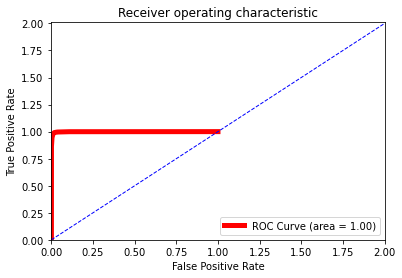

In [109]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_Randomforest,tpr_Randomforest, color='red', lw=5, 
         label='ROC Curve (area = %0.2f)' % AUC_RandomForest)

# Random Guess line:
plt.plot([0, 2], [0, 2], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 2.005])
plt.ylim([0.0, 2.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# ML4_Algorithm : Gradient Boosting Classifier

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
Gradient_boosting_classifier = GradientBoostingClassifier(random_state=0)
Gradient_boosting_classifier.fit(x_vector_train_data, y_train_data)

GradientBoostingClassifier(random_state=0)

In [112]:
# Predicting the Binary Label:
y_predict_Gradient_boosting_classifier = Gradient_boosting_classifier.predict(x_vector_test_data)

In [114]:
Gradient_boosting_classifier.score(x_vector_test_data, y_test_data)

0.9950980392156863

In [115]:
print(classification_report(y_test_data, y_predict_Gradient_boosting_classifier))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5903
           1       0.99      1.00      0.99      5317

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [116]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_Gradient_boosting_classifier = Gradient_boosting_classifier.predict_proba(x_vector_test_data)

# This line prints the "actual label" of the testing set:
print(y_test_data)

# This line prints the "predicted label" for the testing set:
print(y_predict_Gradient_boosting_classifier)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_Gradient_boosting_classifier)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_Gradient_boosting_classifier[:,1])

6070     1
33541    0
33575    1
9627     1
41265    1
        ..
41142    1
2275     0
44033    1
34922    1
20014    1
Name: fake/true, Length: 11220, dtype: int64
[1 0 1 ... 1 1 1]
[[0.01282543 0.98717457]
 [0.99577822 0.00422178]
 [0.00698056 0.99301944]
 ...
 [0.00698056 0.99301944]
 [0.01549616 0.98450384]
 [0.00698056 0.99301944]]
[0.98717457 0.00422178 0.99301944 ... 0.99301944 0.98450384 0.99301944]


In [117]:
from sklearn import metrics

fpr_Gradient_boosting_classifier, tpr_Gradient_boosting_classifier, thresholds = metrics.roc_curve(y_test_data, y_predict_prob_Gradient_boosting_classifier[:,1], pos_label=1)

print(fpr_Gradient_boosting_classifier)
print(tpr_Gradient_boosting_classifier)

# AUC:
AUC_Gradient_boosting_classifier = metrics.auc(fpr_Gradient_boosting_classifier, tpr_Gradient_boosting_classifier)
print(AUC_Gradient_boosting_classifier)



[0.00000000e+00 0.00000000e+00 1.69405387e-04 1.69405387e-04
 1.69405387e-04 1.69405387e-04 1.69405387e-04 1.69405387e-04
 1.69405387e-04 1.69405387e-04 1.69405387e-04 1.69405387e-04
 3.38810774e-04 3.38810774e-04 3.38810774e-04 5.08216161e-04
 5.08216161e-04 5.08216161e-04 5.08216161e-04 1.18583771e-03
 1.18583771e-03 1.18583771e-03 1.18583771e-03 1.18583771e-03
 1.18583771e-03 1.18583771e-03 1.18583771e-03 1.18583771e-03
 1.18583771e-03 1.18583771e-03 1.18583771e-03 1.18583771e-03
 1.18583771e-03 1.69405387e-03 1.69405387e-03 1.69405387e-03
 1.69405387e-03 1.69405387e-03 1.69405387e-03 1.69405387e-03
 1.69405387e-03 1.69405387e-03 1.69405387e-03 1.69405387e-03
 1.69405387e-03 1.69405387e-03 1.69405387e-03 1.69405387e-03
 1.69405387e-03 1.69405387e-03 1.69405387e-03 1.69405387e-03
 1.69405387e-03 1.69405387e-03 1.86345926e-03 1.86345926e-03
 2.03286465e-03 2.03286465e-03 2.20227003e-03 2.20227003e-03
 2.54108081e-03 2.87989158e-03 2.87989158e-03 3.04929697e-03
 3.04929697e-03 5.929188

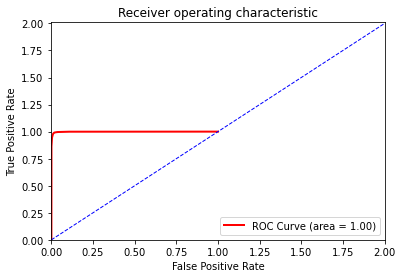

In [118]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_Randomforest,tpr_Randomforest, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_Gradient_boosting_classifier)

# Random Guess line:
plt.plot([0, 2], [0, 2], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 2.005])
plt.ylim([0.0, 2.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Comparing the Algorithm's AUC values and plotting the ROC curves

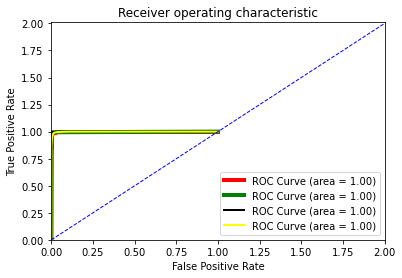

In [119]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
%matplotlib inline

plt.figure()

# Roc Curve1 - Logistic Regression:
plt.plot(fpr, tpr, color='red', lw=4, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Roc Curve2 - Decision Tree Classifier:
plt.plot(fpr1_decision_tree, tpr1_decision_tree, color='green', lw=4, 
         label='ROC Curve (area = %0.2f)' % AUC_decision_Tree_classifier)

# Roc Curve3 - Gradient Boosting Classifier:
plt.plot(fpr_Gradient_boosting_classifier, tpr_Gradient_boosting_classifier, color='black', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_Gradient_boosting_classifier)

# Roc Curve4 - Random Forest:
plt.plot(fpr_Randomforest, tpr_Randomforest, color='yellow', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_RandomForest)

# Random Guess line:
plt.plot([0, 2], [0, 2], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 2.005])
plt.ylim([0.0, 2.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Testing the Model 


Step 14: Here we are going to enter the news manually from the dataset we had created , and test the model by giving the news as input.The model will test the news data given as input and detect if it is fake or true and display the result.

In [122]:
def output_lable(n):
    if n == 0:
        return "This is a Fake News"
    elif n == 1:
        return "This is Not A Fake News"
    
def manual_testing(input_news):
    news_test = {"text":[input_news]}
    test_new_def = pd.DataFrame(news_test)
    test_new_def["text"] = test_new_def["text"].apply(word_del) 
    new_x_test = test_new_def["text"]
    new_x_vector_test = vector.transform(new_x_test)
    Log_Reg_pred = logistic_Reg.predict(new_x_vector_test)
    Dec_Tree_pred = decision_Tree_classifier.predict(new_x_vector_test)
    Gradient_pred = Gradient_boosting_classifier.predict(new_x_vector_test)
    Random_Forest_pred = RandomForest.predict(new_x_vector_test)

    return print("\n\nLogistic Regression Prediction: {} \nDecision Tree Prediction: {} \nGradient Boosting Classifier Prediction: {} \nRandom Forest Classifier Prediction: {}".format(output_lable(Log_Reg_pred[0]), 
                                                                                                                                                                                        output_lable(Dec_Tree_pred[0]), 
                                                                                                                                                                                        output_lable(Gradient_pred[0]), 
                                                                                                                                                                                        output_lable(Random_Forest_pred[0])))

In [123]:
input_news = str(input())
manual_testing(input_news) # textbox to be displayed

21407,"Mata Pires, owner of embattled Brazil builder OAS, dies","SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo 